<a href="https://colab.research.google.com/github/ThuyHaLE/Problem3_Natural-Language-Processing/blob/main/NLP_Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization

Tokenization is the process of representing raw text in smaller units called tokens. These tokens can then be mapped with numbers to further feed to an NLP model.

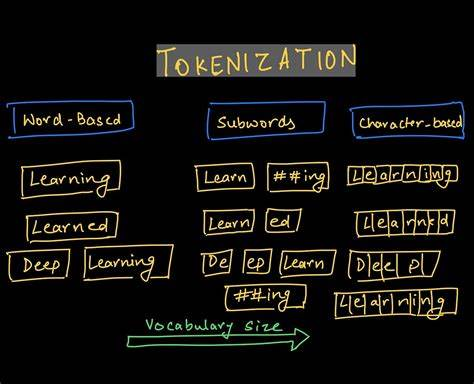

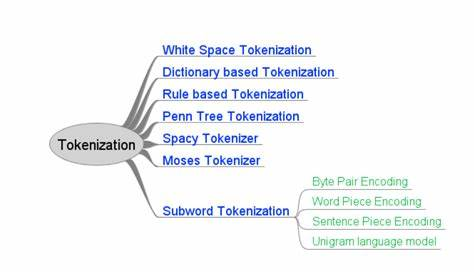

##Sentence based

In [ ]:
import nltk
#import nltk for tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Sentence Tokenization using nltk
from nltk import sent_tokenize
text = '''I'll be there within 5 min. Shouldn't you be there too.
          I'd love to see u there my dear. It's awesome to meet new friends.
          We've been waiting for this day for so long.'''
sent_tokenize(text)

["I'll be there within 5 min.",
 "Shouldn't you be there too.",
 "I'd love to see u there my dear.",
 "It's awesome to meet new friends.",
 "We've been waiting for this day for so long."]

##Word based

Word tokenization using spacy

In [ ]:
#Word tokenization using spacy
!pip -q install -U spacy==3.*
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 29.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
s = '''I'll be there within 5 min. Shouldn't you be there too?
      I'd love to see u there my dear. It's awesome to meet new friends.
      We've been waiting for this day for so long.'''
doc = nlp(s)
print(f'Token list: {[t.text for t in doc]}')

Token list: ['I', "'ll", 'be', 'there', 'within', '5', 'min', '.', 'Should', "n't", 'you', 'be', 'there', 'too', '?', '\n      ', 'I', "'d", 'love', 'to', 'see', 'u', 'there', 'my', 'dear', '.', 'It', "'s", 'awesome', 'to', 'meet', 'new', 'friends', '.', '\n      ', 'We', "'ve", 'been', 'waiting', 'for', 'this', 'day', 'for', 'so', 'long', '.']


Word tokenization using SentencePiece

In [ ]:
#Tokenization using SentencePiece
!pip install -q sentencepiece
!wget -q https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt

In [ ]:
#Word tokenization using SentencePiece
import sentencepiece as spm
import re
spm.SentencePieceTrainer.train('--input=botchan.txt --model_prefix=m_word --model_type=word --vocab_size=2000')
sp = spm.SentencePieceProcessor()
sp.load('/content/m_word.model')

string = re.sub(r"[^\w\s]", "", text) #remove punctuation
print(string)

# encode: text => id
print(f'encode_as_pieces: {[t for t in sp.encode_as_pieces(string)]}')

Ill be there within 5 min Shouldnt you be there too
Id love to see u there my dear Its awesome to meet new friends
Weve been waiting for this day for so long
encode_as_pieces: ['▁Ill', '▁be', '▁there', '▁within', '▁5▁min▁Shouldnt', '▁you', '▁be', '▁there', '▁too', '▁Id', '▁love', '▁to', '▁see', '▁u', '▁there', '▁my', '▁dear', '▁Its', '▁awesome', '▁to', '▁meet', '▁new', '▁friends', '▁Weve', '▁been', '▁waiting', '▁for', '▁this', '▁day', '▁for', '▁so', '▁long']


Word tokenization using nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Word tokenization using nltk
from nltk import word_tokenize
text = '''I'll be there within 5 min. Shouldn't you be there too?
      I'd love to see u there my dear. It's awesome to meet new friends.
      We've been waiting for this day for so long.'''
print(f'Token list: {[token.lower() for token in word_tokenize(text)]}')

Token list: ['i', "'ll", 'be', 'there', 'within', '5', 'min', '.', 'should', "n't", 'you', 'be', 'there', 'too', '?', 'i', "'d", 'love', 'to', 'see', 'u', 'there', 'my', 'dear', '.', 'it', "'s", 'awesome', 'to', 'meet', 'new', 'friends', '.', 'we', "'ve", 'been', 'waiting', 'for', 'this', 'day', 'for', 'so', 'long', '.']


>WhitespaceTokenizer

In [ ]:
#WhitespaceTokenizer
#separated by whitespace characters like space, tab, or newline

from nltk.tokenize import WhitespaceTokenizer
tk = WhitespaceTokenizer()
gfg = "GeeksforGeeks \nis\t for geeks"
print(f'Token list: {[t for t in tk.tokenize(gfg)]}')

Token list: ['GeeksforGeeks', 'is', 'for', 'geeks']


>Dictionary Based Tokenization

In [ ]:
#Dictionary Based Tokenization
#using a predefined list of words or phrases (dictionaries or lexicons) to match text segments with tokens.
#used for handling specific types of tokens like emoticons, slang, or abbreviations.

from nltk import word_tokenize
from nltk.tokenize import MWETokenizer
# customn dictionary
dictionary = [("Jammu", "Kashmir"),
              ("Pawan", "Kumar", "Gunjan"),
              ("Himachal", "Pradesh")]
# Create an instance of MWETokenizer with the dictionary
Dictionary_tokenizer = MWETokenizer(dictionary, separator=' ')

text = """
Jammu Kashmir is an integral part of India.
My name is Pawan Kumar Gunjan.
He is from Himachal Pradesh.
"""
print(f'Token list (General Word Tokenization): {[t for t in word_tokenize(text)]}')
print(f'Token list (Dictionary based tokenization): {[t for t in Dictionary_tokenizer.tokenize(word_tokenize(text)) ]}')

Token list (General Word Tokenization): ['Jammu', 'Kashmir', 'is', 'an', 'integral', 'part', 'of', 'India', '.', 'My', 'name', 'is', 'Pawan', 'Kumar', 'Gunjan', '.', 'He', 'is', 'from', 'Himachal', 'Pradesh', '.']
Token list (Dictionary based tokenization): ['Jammu Kashmir', 'is', 'an', 'integral', 'part', 'of', 'India', '.', 'My', 'name', 'is', 'Pawan Kumar Gunjan', '.', 'He', 'is', 'from', 'Himachal Pradesh', '.']


>Rule-Based Tokenization

In [ ]:
#Rule-Based Tokenization
#using predefined rules (usually based on regular expressions or grammar patterns) to break a text into tokens

#Load the input text
text = "Hello, I am working at Geeks-for-Geeks and my email is pawangunjan23@geeksforgeeks.com."
#Define the tokenization rules (split on whitespace)
tokens = text.split()
#Output the tokens
print(f'Token list: {[t for t in tokens]}')

Token list: ['Hello,', 'I', 'am', 'working', 'at', 'Geeks-for-Geeks', 'and', 'my', 'email', 'is', 'pawangunjan23@geeksforgeeks.com.']


In [ ]:
#Rule-Based Tokenization
#using predefined rules (usually based on regular expressions or grammar patterns) to break a text into tokens

import re
#Load the input text
text = "Hello, I am working at Geeks-for-Geeks and my email is pawangunjan23@geeksforgeeks.com."
#Define the regular expression pattern
p='([\w]+-[\w]+-[\w]+)|([\w\.-]+@[\w]+.[\w]+)'
# Apply the rules to the input text
matches = []
for match in re.findall(p, text):
    if match[0]:
        print(f"Company Name: {match[0]}")
        matches.append(match[0])
    else:
        print(f"Email address: {match[1]}")
        matches.append(match[1])

Company Name: Geeks-for-Geeks
Email address: pawangunjan23@geeksforgeeks.com


In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|\$[\d.]+|.\S+') #\$\s*\d+
print(f'Token list: {[w.lower() for w in tokenizer.tokenize(text)]}')

tokenizer = RegexpTokenizer(r'([\w]+-[\w]+-[\w]+)') #\$\s*\d+
print(f'Token list: {[w.lower() for w in tokenizer.tokenize(text)]}')

tokenizer = RegexpTokenizer(r'([\w\.-]+@[\w]+.[\w]+)') #\$\s*\d+
print(f'Token list: {[w.lower() for w in tokenizer.tokenize(text)]}')

Token list: ['hello', ' i', ' am', ' working', ' at', ' geeks-for-geeks', ' and', ' my', ' email', ' is', ' pawangunjan23@geeksforgeeks.com.']
Token list: ['geeks-for-geeks']
Token list: ['pawangunjan23@geeksforgeeks.com']


>Penn Tree Tokenization

In [ ]:
#Penn Tree Tokenization
#based on the Penn Treebank tokenization guidelines (widely used)
#tokens are separated by whitespace characters, but some punctuation marks are treated as separate tokens
from nltk.tokenize.treebank import TreebankWordTokenizer, TreebankWordDetokenizer
s = '''Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\nThanks.'''
t = TreebankWordTokenizer()
print(f'Token list: {[t for t in t.tokenize(s)]}')

Token list: ['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York.', 'Please', 'buy', 'me', 'two', 'of', 'them.', 'Thanks', '.']


>Moses Tokenization

In [ ]:
#Moses Tokenization
!pip -q install mosestokenizer

In [ ]:
#Moses Tokenization
#tokens are separated by whitespace characters and certain punctuation marks, handle Unicode characters and special cases like abbreviations and numbers
from mosestokenizer import MosesTokenizer, MosesDetokenizer
s = "Good muffins cost $3.88 in New York.  Please buy me two of them. Thanks."
tokenize = MosesTokenizer('en')
print(f'Token list: {[t for t in tokenize(s)]}')

Token list: ['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']


##Character based

In [ ]:
#Load the input text
text = "Hello, I am working at Geeks-for-Geeks and my email is pawangunjan23@geeksforgeeks.com."
#Define the tokenization rules (split on whitespace)
words = text.split()
tokens = []
for word in words:
  tokens+=' '.join(word).split()
#Output the tokens
print(f'Token list: {[t for t in tokens]}')

Token list: ['H', 'e', 'l', 'l', 'o', ',', 'I', 'a', 'm', 'w', 'o', 'r', 'k', 'i', 'n', 'g', 'a', 't', 'G', 'e', 'e', 'k', 's', '-', 'f', 'o', 'r', '-', 'G', 'e', 'e', 'k', 's', 'a', 'n', 'd', 'm', 'y', 'e', 'm', 'a', 'i', 'l', 'i', 's', 'p', 'a', 'w', 'a', 'n', 'g', 'u', 'n', 'j', 'a', 'n', '2', '3', '@', 'g', 'e', 'e', 'k', 's', 'f', 'o', 'r', 'g', 'e', 'e', 'k', 's', '.', 'c', 'o', 'm', '.']


Character tokenization using SentencePiece <Br>
https://colab.research.google.com/github/google/sentencepiece/blob/master/python/sentencepiece_python_module_example.ipynb

In [ ]:
#Tokenization using SentencePiece
!pip install -q sentencepiece
!wget -q https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt

In [ ]:
#Character tokenization using SentencePiece
import sentencepiece as spm
spm.SentencePieceTrainer.train('--input=/content/botchan.txt --model_prefix=m_char --model_type=char --vocab_size=2000')
sp = spm.SentencePieceProcessor()
sp.load('/content/m_char.model')

text = '''I'll be there within 5 min. Shouldn't you be there too?
I'd love to see u there my dear. It's awesome to meet new friends.
We've been waiting for this day for so long.'''

string = re.sub(r"[^\w\s]", "", text) #remove punctuation
print(string)

# encode: text => id
print(f'encode_as_pieces: {[t for t in sp.encode_as_pieces(string)]}')

Ill be there within 5 min Shouldnt you be there too
Id love to see u there my dear Its awesome to meet new friends
Weve been waiting for this day for so long
encode_as_pieces: ['▁', 'I', 'l', 'l', '▁', 'b', 'e', '▁', 't', 'h', 'e', 'r', 'e', '▁', 'w', 'i', 't', 'h', 'i', 'n', '▁', '5', '▁', 'm', 'i', 'n', '▁', 'S', 'h', 'o', 'u', 'l', 'd', 'n', 't', '▁', 'y', 'o', 'u', '▁', 'b', 'e', '▁', 't', 'h', 'e', 'r', 'e', '▁', 't', 'o', 'o', '▁', 'I', 'd', '▁', 'l', 'o', 'v', 'e', '▁', 't', 'o', '▁', 's', 'e', 'e', '▁', 'u', '▁', 't', 'h', 'e', 'r', 'e', '▁', 'm', 'y', '▁', 'd', 'e', 'a', 'r', '▁', 'I', 't', 's', '▁', 'a', 'w', 'e', 's', 'o', 'm', 'e', '▁', 't', 'o', '▁', 'm', 'e', 'e', 't', '▁', 'n', 'e', 'w', '▁', 'f', 'r', 'i', 'e', 'n', 'd', 's', '▁', 'W', 'e', 'v', 'e', '▁', 'b', 'e', 'e', 'n', '▁', 'w', 'a', 'i', 't', 'i', 'n', 'g', '▁', 'f', 'o', 'r', '▁', 't', 'h', 'i', 's', '▁', 'd', 'a', 'y', '▁', 'f', 'o', 'r', '▁', 's', 'o', '▁', 'l', 'o', 'n', 'g']


##Subwords based

Normalization and pre-tokenization

In [ ]:
!pip -q install datasets evaluate transformers[sentencepiece]

In [ ]:
from transformers import AutoTokenizer

In [ ]:
#BPE model like Transformer models, including GPT, GPT-2, RoBERTa, BART, and DeBERTa.
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str("Hello, how are  you?")

[('Hello', (0, 5)),
 (',', (5, 6)),
 ('Ġhow', (6, 10)),
 ('Ġare', (10, 14)),
 ('Ġ', (14, 15)),
 ('Ġyou', (15, 19)),
 ('?', (19, 20))]

In [ ]:
#WordPiece model like Transformer models based on BERT, such as DistilBERT, MobileBERT, Funnel Transformers, and MPNET
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
print(tokenizer.backend_tokenizer.normalizer.normalize_str("Héllò hôw are ü?"))
tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str("Hello, how are  you?")

hello how are u?


[('Hello', (0, 5)),
 (',', (5, 6)),
 ('how', (7, 10)),
 ('are', (11, 14)),
 ('you', (16, 19)),
 ('?', (19, 20))]

In [ ]:
#Unigram model like AlBERT, T5, mBART, Big Bird, and XLNet
tokenizer = AutoTokenizer.from_pretrained("t5-small")
print(tokenizer.backend_tokenizer.normalizer.normalize_str("Héllò hôw are ü?"))
tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str("Hello, how are  you?")

Héllò hôw are ü?


[('▁Hello,', (0, 6)),
 ('▁how', (7, 10)),
 ('▁are', (11, 14)),
 ('▁you?', (16, 20))]

Subwords based tokenization

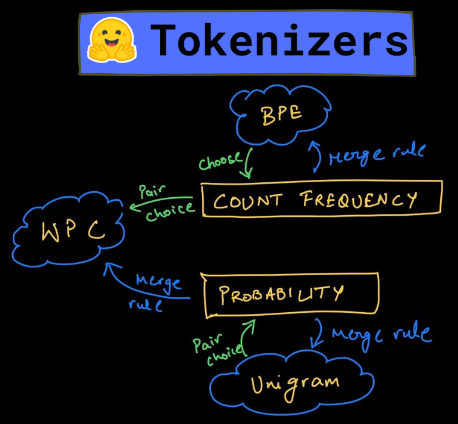

###BPE Algorithm – a Frequency-based Model
Byte Pair Encoding uses the frequency of subword patterns to shortlist them for merging.

- Step 1: Splitting all text (in a corpus) into individual words and calculating the word frequency (word-frequency dictionary).
- Step 2: Splitting the word (word-frequency dictionary) into characters and then calculating the character frequency (character-frequency dictionary).
- Step 3: Merging the most frequently occurring consecutive byte pairing.
- Step 4: Iterating a number of times to find the best (in terms of frequency) pairs to encode and then concatenate them to find the subwords.

Step 1: Splitting all text (in a corpus) into individual words and calculating the word frequency (word-frequency dictionary).

In [ ]:
import collections

text = "There is an 80% chance of rainfall today. We are pretty sure it is going to rain."
## get the word frequency and add the end of word (</w>) token at the end of each word
words = text.strip().split(" ")
word_freq_dict = collections.defaultdict(int)
for word in words:
    word_freq_dict[' '.join(word) + ' </w>'] += 1

print(f"Vocabulary size: {len(words)}")
print(f'Word list: {words}')
print(f'Word frequency list: {[f"{k}: {v}" for k, v in word_freq_dict.items()]}')

Vocabulary size: 17
Word list: ['There', 'is', 'an', '80%', 'chance', 'of', 'rainfall', 'today.', 'We', 'are', 'pretty', 'sure', 'it', 'is', 'going', 'to', 'rain.']
Word frequency list: ['T h e r e </w>: 1', 'i s </w>: 2', 'a n </w>: 1', '8 0 % </w>: 1', 'c h a n c e </w>: 1', 'o f </w>: 1', 'r a i n f a l l </w>: 1', 't o d a y . </w>: 1', 'W e </w>: 1', 'a r e </w>: 1', 'p r e t t y </w>: 1', 's u r e </w>: 1', 'i t </w>: 1', 'g o i n g </w>: 1', 't o </w>: 1', 'r a i n . </w>: 1']


Step 2: Splitting the word (word-frequency dictionary) into characters and then calculating the character frequency (character-frequency dictionary).

In [ ]:
char_freq_dict = collections.defaultdict(int)
for word, freq in word_freq_dict.items():
    chars = word.split()
    for char in chars:
        char_freq_dict[char] += freq
print(f'Character frequency list: {[f"{k}: {v}" for k, v in char_freq_dict.items()]}')

#import pandas as pd
#df = pd.DataFrame(char_freq_dict, index=[0]).T
#df = df.rename(columns={0: 'Count'})
#df.head()

Character frequency list: ['T: 1', 'h: 2', 'e: 7', 'r: 6', '</w>: 17', 'i: 6', 's: 3', 'a: 7', 'n: 5', '8: 1', '0: 1', '%: 1', 'c: 2', 'o: 4', 'f: 2', 'l: 2', 't: 5', 'd: 1', 'y: 2', '.: 2', 'W: 1', 'p: 1', 'u: 1', 'g: 2']


Step 3: Merging the most frequently occurring consecutive byte pairing.

In [ ]:
import re
#Create all possible consecutive pairs
pairs = collections.defaultdict(int)
for word, freq in word_freq_dict.items():
    chars = word.split()
    for i in range(len(chars)-1):
        pairs[chars[i], chars[i+1]] += freq
print(f'Pairs frequency list: {[f"{k}: {v}" for k, v in pairs.items()]}')
print(f'The most frequent occurrences of pairs: {max(pairs, key=pairs.get)}: {pairs[max(pairs, key=pairs.get)]}')

Pairs frequency list: ["('T', 'h'): 1", "('h', 'e'): 1", "('e', 'r'): 1", "('r', 'e'): 4", "('e', '</w>'): 5", "('i', 's'): 2", "('s', '</w>'): 2", "('a', 'n'): 2", "('n', '</w>'): 1", "('8', '0'): 1", "('0', '%'): 1", "('%', '</w>'): 1", "('c', 'h'): 1", "('h', 'a'): 1", "('n', 'c'): 1", "('c', 'e'): 1", "('o', 'f'): 1", "('f', '</w>'): 1", "('r', 'a'): 2", "('a', 'i'): 2", "('i', 'n'): 3", "('n', 'f'): 1", "('f', 'a'): 1", "('a', 'l'): 1", "('l', 'l'): 1", "('l', '</w>'): 1", "('t', 'o'): 2", "('o', 'd'): 1", "('d', 'a'): 1", "('a', 'y'): 1", "('y', '.'): 1", "('.', '</w>'): 2", "('W', 'e'): 1", "('a', 'r'): 1", "('p', 'r'): 1", "('e', 't'): 1", "('t', 't'): 1", "('t', 'y'): 1", "('y', '</w>'): 1", "('s', 'u'): 1", "('u', 'r'): 1", "('i', 't'): 1", "('t', '</w>'): 1", "('g', 'o'): 1", "('o', 'i'): 1", "('n', 'g'): 1", "('g', '</w>'): 1", "('o', '</w>'): 1", "('n', '.'): 1"]
The most frequent occurrences of pairs: ('e', '</w>'): 5


Step 4: Iterating a number of times to find the best (in terms of frequency) pairs to encode and then concatenate them to find the subwords.

In [ ]:
def get_pairs(word_freq_dict):
    pairs = collections.defaultdict(int)
    for word, freq in word_freq_dict.items():
        chars = word.split()
        for i in range(len(chars)-1):
            pairs[chars[i], chars[i+1]] += freq
    return pairs

def merge_byte_pairs(best_pair, word_freq_dict):
    merged_dict = {}
    bigram = re.escape(' '.join(best_pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in word_freq_dict:
        # print(word)
        w_out = p.sub(''.join(best_pair), word)
        merged_dict[w_out] = word_freq_dict[word]
    return merged_dict

def get_subword_tokens(word_freq_dict):
    char_freq_dict = collections.defaultdict(int)
    for word, freq in word_freq_dict.items():
        chars = word.split()
        for char in chars:
            char_freq_dict[char] += freq
    return char_freq_dict

text = "There is an 80% chance of rainfall today. We are pretty sure it is going to rain."
## get the word frequency and add the end of word (</w>) token at the end of each word
words = text.strip().split(" ")
word_freq_dict = collections.defaultdict(int)
for word in words:
    word_freq_dict[' '.join(word) + ' </w>'] += 1

i = 0
while True:
    #Find the most frequently occurring byte pairs in each iteration.
    pairs = get_pairs(word_freq_dict)
    if len(pairs) == 0:
      break
    else:
      best_pair = max(pairs, key=pairs.get)
      print(f'The most frequent occurrences of pairs: {best_pair}: {pairs[best_pair]}')
      print(f"Iteration {i}: ")
      #Merge these tokens
      word_freq_dict = merge_byte_pairs(best_pair, word_freq_dict)
      print(f'Word frequency list: {[f"{k}: {v}" for k, v in word_freq_dict.items()]}')
      #Recalculate the character tokens frequency with the new pair encoding added
      subword_tokens = get_subword_tokens(word_freq_dict)
      print(len(subword_tokens))
      print(f'Character frequency list: {[f"{k}: {v}" for k, v in subword_tokens.items()]}')
      print("--------")
      #Keep doing it until there is no more pair or you reach the end of the for loop.
      i+=1

The most frequent occurrences of pairs: ('e', '</w>'): 5
Iteration 0: 
Word frequency list: ['T h e r e</w>: 1', 'i s </w>: 2', 'a n </w>: 1', '8 0 % </w>: 1', 'c h a n c e</w>: 1', 'o f </w>: 1', 'r a i n f a l l </w>: 1', 't o d a y . </w>: 1', 'W e</w>: 1', 'a r e</w>: 1', 'p r e t t y </w>: 1', 's u r e</w>: 1', 'i t </w>: 1', 'g o i n g </w>: 1', 't o </w>: 1', 'r a i n . </w>: 1']
25
Character frequency list: ['T: 1', 'h: 2', 'e: 2', 'r: 6', 'e</w>: 5', 'i: 6', 's: 3', '</w>: 12', 'a: 7', 'n: 5', '8: 1', '0: 1', '%: 1', 'c: 2', 'o: 4', 'f: 2', 'l: 2', 't: 5', 'd: 1', 'y: 2', '.: 2', 'W: 1', 'p: 1', 'u: 1', 'g: 2']
--------
The most frequent occurrences of pairs: ('r', 'e</w>'): 3
Iteration 1: 
Word frequency list: ['T h e re</w>: 1', 'i s </w>: 2', 'a n </w>: 1', '8 0 % </w>: 1', 'c h a n c e</w>: 1', 'o f </w>: 1', 'r a i n f a l l </w>: 1', 't o d a y . </w>: 1', 'W e</w>: 1', 'a re</w>: 1', 'p r e t t y </w>: 1', 's u re</w>: 1', 'i t </w>: 1', 'g o i n g </w>: 1', 't o </w>: 

Hugging Face

In [ ]:
!pip -q install datasets evaluate transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 10.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [ ]:
corpus = [
    "This is the Hugging Face Course.",
    "This chapter is about tokenization.",
    "This section shows several tokenizer algorithms.",
    "Hopefully, you will be able to understand how they are trained and generate tokens.",
]

Step 1: Splitting all text (in a corpus) into individual words and calculating the word frequency (word-frequency dictionary).

In [ ]:
from collections import defaultdict
word_freqs = defaultdict(int)
for text in corpus:
    #Normalization and pre-tokenization
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
    new_words = [word for word, offset in words_with_offsets]
    for word in new_words:
        word_freqs[word] += 1
print(f"Vocabulary size: {len(word_freqs)}")
print(f'Word list: {list(word_freqs.keys())}')
print(f'Word frequency list: {[f"{k}: {v}" for k, v in word_freqs.items()]}')

Vocabulary size: 30
Word list: ['This', 'Ġis', 'Ġthe', 'ĠHugging', 'ĠFace', 'ĠCourse', '.', 'Ġchapter', 'Ġabout', 'Ġtokenization', 'Ġsection', 'Ġshows', 'Ġseveral', 'Ġtokenizer', 'Ġalgorithms', 'Hopefully', ',', 'Ġyou', 'Ġwill', 'Ġbe', 'Ġable', 'Ġto', 'Ġunderstand', 'Ġhow', 'Ġthey', 'Ġare', 'Ġtrained', 'Ġand', 'Ġgenerate', 'Ġtokens']
Word frequency list: ['This: 3', 'Ġis: 2', 'Ġthe: 1', 'ĠHugging: 1', 'ĠFace: 1', 'ĠCourse: 1', '.: 4', 'Ġchapter: 1', 'Ġabout: 1', 'Ġtokenization: 1', 'Ġsection: 1', 'Ġshows: 1', 'Ġseveral: 1', 'Ġtokenizer: 1', 'Ġalgorithms: 1', 'Hopefully: 1', ',: 1', 'Ġyou: 1', 'Ġwill: 1', 'Ġbe: 1', 'Ġable: 1', 'Ġto: 1', 'Ġunderstand: 1', 'Ġhow: 1', 'Ġthey: 1', 'Ġare: 1', 'Ġtrained: 1', 'Ġand: 1', 'Ġgenerate: 1', 'Ġtokens: 1']


Step 2: Splitting the word (word-frequency dictionary) into characters and then calculating the character frequency (character-frequency dictionary).

In [ ]:
alphabet = []
for word in word_freqs.keys():
    for letter in word:
        if letter not in alphabet:
            alphabet.append(letter)
alphabet.sort()
print(f'Character list: {alphabet}')
vocab = ["<|endoftext|>"] + alphabet.copy()
print(f'Length of vocabulary list: {len(vocab)}')
print(f'Vocabulary list: {vocab}')

Character list: [',', '.', 'C', 'F', 'H', 'T', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', 'Ġ']
Length of vocabulary list: 31
Vocabulary list: ['<|endoftext|>', ',', '.', 'C', 'F', 'H', 'T', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', 'Ġ']


Step 3: Merging the most frequently occurring consecutive byte pairing.

In [ ]:
def compute_pair_freqs(splits):
    pair_freqs = defaultdict(int)
    for word, freq in word_freqs.items():
        split = splits[word]
        if len(split) == 1:
            continue
        for i in range(len(split) - 1):
            pair = (split[i], split[i + 1])
            pair_freqs[pair] += freq
    return pair_freqs
print(f'Word frequency list: {[f"{k}: {v}" for k, v in word_freqs.items()]}')
splits = {word: [c for c in word] for word in word_freqs.keys()}
print(f'Word split: {[f"{k}: {v}" for k, v in splits.items()]}')
pair_freqs = compute_pair_freqs(splits)
print(f'Pairs frequency list: {[f"{k}: {v}" for k, v in pair_freqs.items()]}')
best_pair = ""
max_freq = None
for pair, freq in pair_freqs.items():
    if max_freq is None or max_freq < freq:
        best_pair = pair
        max_freq = freq
print(f'The most frequent occurrences of pairs: {best_pair}: {max_freq}')

Word frequency list: ['This: 3', 'Ġis: 2', 'Ġthe: 1', 'ĠHugging: 1', 'ĠFace: 1', 'ĠCourse: 1', '.: 4', 'Ġchapter: 1', 'Ġabout: 1', 'Ġtokenization: 1', 'Ġsection: 1', 'Ġshows: 1', 'Ġseveral: 1', 'Ġtokenizer: 1', 'Ġalgorithms: 1', 'Hopefully: 1', ',: 1', 'Ġyou: 1', 'Ġwill: 1', 'Ġbe: 1', 'Ġable: 1', 'Ġto: 1', 'Ġunderstand: 1', 'Ġhow: 1', 'Ġthey: 1', 'Ġare: 1', 'Ġtrained: 1', 'Ġand: 1', 'Ġgenerate: 1', 'Ġtokens: 1']
Word split: ["This: ['T', 'h', 'i', 's']", "Ġis: ['Ġ', 'i', 's']", "Ġthe: ['Ġ', 't', 'h', 'e']", "ĠHugging: ['Ġ', 'H', 'u', 'g', 'g', 'i', 'n', 'g']", "ĠFace: ['Ġ', 'F', 'a', 'c', 'e']", "ĠCourse: ['Ġ', 'C', 'o', 'u', 'r', 's', 'e']", ".: ['.']", "Ġchapter: ['Ġ', 'c', 'h', 'a', 'p', 't', 'e', 'r']", "Ġabout: ['Ġ', 'a', 'b', 'o', 'u', 't']", "Ġtokenization: ['Ġ', 't', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'o', 'n']", "Ġsection: ['Ġ', 's', 'e', 'c', 't', 'i', 'o', 'n']", "Ġshows: ['Ġ', 's', 'h', 'o', 'w', 's']", "Ġseveral: ['Ġ', 's', 'e', 'v', 'e', 'r', 'a', 'l']", "Ġtoken

- Step 4: Iterating a number of times to find the best (in terms of frequency) pairs to encode and then concatenate them to find the subwords.

In [ ]:
def merge_pair(a, b, splits):
    for word in word_freqs:
        split = splits[word]
        if len(split) == 1:
            continue
        i = 0
        while i < len(split) - 1:
            if split[i] == a and split[i + 1] == b:
                #print(word, "==>", split, "==>", split[:i] + [a + b] + split[i + 2 :])
                split = split[:i] + [a + b] + split[i + 2 :]
            else:
                i += 1
        splits[word] = split
    return splits
merges = {}
vocab_size = 50
while len(vocab) < vocab_size:
    pair_freqs = compute_pair_freqs(splits)
    best_pair = ""
    max_freq = None
    for pair, freq in pair_freqs.items():
        if max_freq is None or max_freq < freq:
            best_pair = pair
            max_freq = freq
    splits = merge_pair(*best_pair, splits)
    merges[best_pair] = best_pair[0] + best_pair[1]
    vocab.append(best_pair[0] + best_pair[1])
print(f'Length of Merged list: {len(merges)}')
print(f'Merged list:  {[f"{k}: {v}" for k, v in merges.items()]}')
print(f'Length of vocabulary list: {len(vocab)}')
print(f'Vocabulary list: {vocab}')
print('===><===')

def tokenize(text):
    #Normalization & Pre-tokenization
    pre_tokenize_result = tokenizer._tokenizer.pre_tokenizer.pre_tokenize_str(text)
    print(pre_tokenize_result)
    pre_tokenized_text = [word for word, offset in pre_tokenize_result]
    print(pre_tokenized_text)
    #Splitting the words into individual characters
    splits = [[l for l in word] for word in pre_tokenized_text]
    print(splits)
    print([f"{word}: {[l for l in word]}" for word in pre_tokenized_text] )
    #Applying the merge rules learned in order on those splits
    for pair, merge in merges.items():
        for idx, split in enumerate(splits):
            i = 0
            while i < len(split) - 1:
                if split[i] == pair[0] and split[i + 1] == pair[1]:
                    print(merge, "==>", split, "==>", split[:i] + [merge] + split[i + 2 :])
                    split = split[:i] + [merge] + split[i + 2 :]
                else:
                    i += 1
            splits[idx] = split
    return sum(splits, [])

print(tokenize("This is not a token."))

Length of Merged list: 19
Merged list:  ["('Ġ', 't'): Ġt", "('i', 's'): is", "('e', 'r'): er", "('Ġ', 'a'): Ġa", "('Ġt', 'o'): Ġto", "('e', 'n'): en", "('T', 'h'): Th", "('Th', 'is'): This", "('o', 'u'): ou", "('s', 'e'): se", "('Ġto', 'k'): Ġtok", "('Ġtok', 'en'): Ġtoken", "('n', 'd'): nd", "('Ġ', 'is'): Ġis", "('Ġt', 'h'): Ġth", "('Ġth', 'e'): Ġthe", "('i', 'n'): in", "('Ġa', 'b'): Ġab", "('Ġtoken', 'i'): Ġtokeni"]
Length of vocabulary list: 50
Vocabulary list: ['<|endoftext|>', ',', '.', 'C', 'F', 'H', 'T', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', 'Ġ', 'Ġt', 'is', 'er', 'Ġa', 'Ġto', 'en', 'Th', 'This', 'ou', 'se', 'Ġtok', 'Ġtoken', 'nd', 'Ġis', 'Ġth', 'Ġthe', 'in', 'Ġab', 'Ġtokeni']
===><===
[('This', (0, 4)), ('Ġis', (4, 7)), ('Ġnot', (7, 11)), ('Ġa', (11, 13)), ('Ġtoken', (13, 19)), ('.', (19, 20))]
['This', 'Ġis', 'Ġnot', 'Ġa', 'Ġtoken', '.']
[['T', 'h', 'i', 's'], ['Ġ', 'i', 's'], ['Ġ', 'n', 'o', 't'], ['Ġ

###WordPiece Algorithm
WordPiece leverages likelihood instead of count frequency to merge the best pair in each iteration but the choice of characters to pair is based on count frequency.

- Step 1: Splitting all text (in a corpus) into individual words and calculating the word frequency (word-frequency dictionary).
- Step 2: Splitting the word (word-frequency dictionary) into characters and then calculating the character frequency (character-frequency dictionary).
- Step 3: Merge the max score occurring consecutive byte pairing.
$(score=\frac{\text{freq_of_pair}}{\text{freq_of_first_element} × \text{freq_of_second_element}})$
- Step 4: Iterate a number of times to find the best (in terms of score) pairs to encode and then concatenate them to find the subwords.

In [ ]:
!pip -q install datasets evaluate transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 8.7 MB/s eta 0:00:00


In [ ]:
corpus = [
    "This is the Hugging Face Course.",
    "This chapter is about tokenization.",
    "This section shows several tokenizer algorithms.",
    "Hopefully, you will be able to understand how they are trained and generate tokens.",
]

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Step 1: Splitting all text (in a corpus) into individual words and calculating the word frequency (word-frequency dictionary).

In [ ]:
from collections import defaultdict
word_freqs = defaultdict(int)
for text in corpus:
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
    new_words = [word for word, offset in words_with_offsets]
    for word in new_words:
        word_freqs[word] += 1
word_freqs
print(f"Vocabulary size: {len(word_freqs)}")
print(f'Word list: {list(word_freqs.keys())}')
print(f'Word frequency list: {[f"{k}: {v}" for k, v in word_freqs.items()]}')

Vocabulary size: 30
Word list: ['This', 'is', 'the', 'Hugging', 'Face', 'Course', '.', 'chapter', 'about', 'tokenization', 'section', 'shows', 'several', 'tokenizer', 'algorithms', 'Hopefully', ',', 'you', 'will', 'be', 'able', 'to', 'understand', 'how', 'they', 'are', 'trained', 'and', 'generate', 'tokens']
Word frequency list: ['This: 3', 'is: 2', 'the: 1', 'Hugging: 1', 'Face: 1', 'Course: 1', '.: 4', 'chapter: 1', 'about: 1', 'tokenization: 1', 'section: 1', 'shows: 1', 'several: 1', 'tokenizer: 1', 'algorithms: 1', 'Hopefully: 1', ',: 1', 'you: 1', 'will: 1', 'be: 1', 'able: 1', 'to: 1', 'understand: 1', 'how: 1', 'they: 1', 'are: 1', 'trained: 1', 'and: 1', 'generate: 1', 'tokens: 1']


Step 2: Splitting the word (word-frequency dictionary) into characters and then calculating the character frequency (character-frequency dictionary).

In [ ]:
#Step 2: Split the word into characters and then calculating the character frequency.
alphabet = []
for word in word_freqs.keys():
    if word[0] not in alphabet:
        alphabet.append(word[0])
    for letter in word[1:]:
        if f"##{letter}" not in alphabet:
            alphabet.append(f"##{letter}")
alphabet.sort()
print(f'Character list: {alphabet}')
vocab = ["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"] + alphabet.copy()
print(f'Length of vocabulary list: {len(vocab)}')
print(f'Vocabulary list: {vocab}')

Character list: ['##a', '##b', '##c', '##d', '##e', '##f', '##g', '##h', '##i', '##k', '##l', '##m', '##n', '##o', '##p', '##r', '##s', '##t', '##u', '##v', '##w', '##y', '##z', ',', '.', 'C', 'F', 'H', 'T', 'a', 'b', 'c', 'g', 'h', 'i', 's', 't', 'u', 'w', 'y']
Length of vocabulary list: 45
Vocabulary list: ['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]', '##a', '##b', '##c', '##d', '##e', '##f', '##g', '##h', '##i', '##k', '##l', '##m', '##n', '##o', '##p', '##r', '##s', '##t', '##u', '##v', '##w', '##y', '##z', ',', '.', 'C', 'F', 'H', 'T', 'a', 'b', 'c', 'g', 'h', 'i', 's', 't', 'u', 'w', 'y']


Step 3: Merge the max score occurring consecutive byte pairing. <Br>
$(score=\frac{\text{freq_of_pair}}{\text{freq_of_first_element} × \text{freq_of_second_element}})$


In [ ]:
def compute_pair_scores(splits):
    letter_freqs = defaultdict(int)
    pair_freqs = defaultdict(int)
    for word, freq in word_freqs.items():
        split = splits[word]
        if len(split) == 1: #a word with 1 letter
            letter_freqs[split[0]] += freq
            continue
        for i in range(len(split) - 1): #a word with more than 2 letters
            pair = (split[i], split[i + 1])
            letter_freqs[split[i]] += freq #freq_of_each_element_except_last_element
            pair_freqs[pair] += freq #freq_of_pair_for_each_element (i, i+1)
        letter_freqs[split[-1]] += freq #freq_of_last_element
    #score=(freq_of_pair)/(freq_of_first_element×freq_of_second_element)
    scores = {pair: freq / (letter_freqs[pair[0]] * letter_freqs[pair[1]]) for pair, freq in pair_freqs.items()}
    return scores

print(f'Word frequency list: {[f"{k}: {v}" for k, v in word_freqs.items()]}')
splits = {word: [c if i == 0 else f"##{c}" for i, c in enumerate(word)]for word in word_freqs.keys()}
print(f'Word split: {[f"{k}: {v}" for k, v in splits.items()]}')
pair_scores = compute_pair_scores(splits)
print(f'Pairs score list: {[f"{k}: {v}" for k, v in pair_scores.items()]}')
best_pair = ""
max_score = None
for pair, score in pair_scores.items():
    if max_score is None or max_score < score:
        best_pair = pair
        max_score = score
print(f'The most frequent occurrences of pairs: {best_pair}: {max_score}')

def merge_pair(a, b, splits):
    for word in word_freqs:
        split = splits[word]
        if len(split) == 1:
            continue
        i = 0
        while i < len(split) - 1:
            if split[i] == a and split[i + 1] == b:
                merge = a + b[2:] if b.startswith("##") else a + b
                split = split[:i] + [merge] + split[i + 2 :]
            else:
                i += 1
        splits[word] = split
    return splits

Word frequency list: ['This: 3', 'is: 2', 'the: 1', 'Hugging: 1', 'Face: 1', 'Course: 1', '.: 4', 'chapter: 1', 'about: 1', 'tokenization: 1', 'section: 1', 'shows: 1', 'several: 1', 'tokenizer: 1', 'algorithms: 1', 'Hopefully: 1', ',: 1', 'you: 1', 'will: 1', 'be: 1', 'able: 1', 'to: 1', 'understand: 1', 'how: 1', 'they: 1', 'are: 1', 'trained: 1', 'and: 1', 'generate: 1', 'tokens: 1']
Word split: ["This: ['T', '##h', '##i', '##s']", "is: ['i', '##s']", "the: ['t', '##h', '##e']", "Hugging: ['H', '##u', '##g', '##g', '##i', '##n', '##g']", "Face: ['F', '##a', '##c', '##e']", "Course: ['C', '##o', '##u', '##r', '##s', '##e']", ".: ['.']", "chapter: ['c', '##h', '##a', '##p', '##t', '##e', '##r']", "about: ['a', '##b', '##o', '##u', '##t']", "tokenization: ['t', '##o', '##k', '##e', '##n', '##i', '##z', '##a', '##t', '##i', '##o', '##n']", "section: ['s', '##e', '##c', '##t', '##i', '##o', '##n']", "shows: ['s', '##h', '##o', '##w', '##s']", "several: ['s', '##e', '##v', '##e', '##r', '

- Step 4: Iterate a number of times to find the best (in terms of score) pairs to encode and then concatenate them to find the subwords.

In [ ]:
vocab_size = 70
while len(vocab) < vocab_size:
    scores = compute_pair_scores(splits)
    best_pair, max_score = "", None
    for pair, score in scores.items():
        if max_score is None or max_score < score:
            best_pair = pair
            max_score = score
    splits = merge_pair(*best_pair, splits)
    new_token = (best_pair[0] + best_pair[1][2:] if best_pair[1].startswith("##") else best_pair[0] + best_pair[1])
    vocab.append(new_token)
print(f'Length of vocabulary list: {len(vocab)}')
print(f'Vocabulary list: {vocab}')
print('===><===')

def encode_word(word):
    tokens = []
    while len(word) > 0:
        i = len(word)
        while i > 0 and word[:i] not in vocab:
            i -= 1
        if i == 0:
            return ["[UNK]"]
        tokens.append(word[:i])
        print(word, '==>', word[:i], ' + ', word[i:])
        word = word[i:]
        if len(word) > 0:
            print(word, '==>', f"##{word}")
            word = f"##{word}"
        print('===')
    return tokens

def tokenize(text):
    #Normalization & Pre-tokenization
    pre_tokenize_result = tokenizer._tokenizer.pre_tokenizer.pre_tokenize_str(text)
    pre_tokenized_text = [word for word, offset in pre_tokenize_result]
    #Applying the merge rules learned in order on those splits
    encoded_words = [encode_word(word) for word in pre_tokenized_text]
    return sum(encoded_words, [])

print(tokenize("This is the Hugging Face course!"))

Length of vocabulary list: 70
Vocabulary list: ['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]', '##a', '##b', '##c', '##d', '##e', '##f', '##g', '##h', '##i', '##k', '##l', '##m', '##n', '##o', '##p', '##r', '##s', '##t', '##u', '##v', '##w', '##y', '##z', ',', '.', 'C', 'F', 'H', 'T', 'a', 'b', 'c', 'g', 'h', 'i', 's', 't', 'u', 'w', 'y', 'ab', '##fu', 'Fa', 'Fac', '##ct', '##ful', '##full', '##fully', 'Th', 'ch', '##hm', 'cha', 'chap', 'chapt', '##thm', 'Hu', 'Hug', 'Hugg', 'sh', 'th', 'is', '##thms', '##za', '##zat', '##ut']
===><===
This ==> Th  +  is
is ==> ##is
===
##is ==> ##i  +  s
s ==> ##s
===
##s ==> ##s  +  
===
is ==> is  +  
===
the ==> th  +  e
e ==> ##e
===
##e ==> ##e  +  
===
Hugging ==> Hugg  +  ing
ing ==> ##ing
===
##ing ==> ##i  +  ng
ng ==> ##ng
===
##ng ==> ##n  +  g
g ==> ##g
===
##g ==> ##g  +  
===
Face ==> Fac  +  e
e ==> ##e
===
##e ==> ##e  +  
===
course ==> c  +  ourse
ourse ==> ##ourse
===
##ourse ==> ##o  +  urse
urse ==> ##urse
===
##urse ==> ##u  +  rs

###Unigram Algorithm – a Probability-based Model
Unigram model solving the merging problem by calculating the likelihood of each subword combination rather than picking the most frequent pattern. Unigram starts from a big vocabulary (token list) and removes tokens from it until it reaches the desired vocabulary size.

- Step 1: Splitting all text (in a corpus) into individual words and calculating the word frequency (word-frequency dictionary).
- Step 2: Splitting the word into individual characters and subwords and then calculating character frequency (character-frequency dictionary) and subword frequency (subword-frequency dictionary).
- Step 3: Building a token-score dictionary (including all characters and the best subwords as tokens) and then calculating its score (probability in terms of minus log's space) .
- Step 4: Based on the token-score dictionary find out the word's score, and split a given word into the best tokens (base characters and subwords) representing that word.
- Step 5: Iterate several times to find the best tokens (in case if remove them will be no/slight difference between the original vocabulary and removed given tokens' vocabulary). And then removing these tokens to reach the desired vocabulary size.

In [ ]:
!pip -q install datasets evaluate transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 14.0 MB/s eta 0:00:00


In [ ]:
corpus = [
    "This is the Hugging Face Course.",
    "This chapter is about tokenization.",
    "This section shows several tokenizer algorithms.",
    "Hopefully, you will be able to understand how they are trained and generate tokens.",
]

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")
from collections import defaultdict

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

Step 1: Splitting all text (in a corpus) into individual words and calculating the word frequency (word-frequency dictionary).

In [ ]:
from collections import defaultdict
word_freqs = defaultdict(int)
for text in corpus:
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
    new_words = [word for word, offset in words_with_offsets]
    for word in new_words:
        word_freqs[word] += 1
print(f"Vocabulary size: {len(word_freqs)}")
print(f'Word list: {list(word_freqs.keys())}')
print(f'Word frequency list: {[f"{k}: {v}" for k, v in word_freqs.items()]}')

Vocabulary size: 28
Word list: ['▁This', '▁is', '▁the', '▁Hugging', '▁Face', '▁Course.', '▁chapter', '▁about', '▁tokenization.', '▁section', '▁shows', '▁several', '▁tokenizer', '▁algorithms.', '▁Hopefully,', '▁you', '▁will', '▁be', '▁able', '▁to', '▁understand', '▁how', '▁they', '▁are', '▁trained', '▁and', '▁generate', '▁tokens.']
Word frequency list: ['▁This: 3', '▁is: 2', '▁the: 1', '▁Hugging: 1', '▁Face: 1', '▁Course.: 1', '▁chapter: 1', '▁about: 1', '▁tokenization.: 1', '▁section: 1', '▁shows: 1', '▁several: 1', '▁tokenizer: 1', '▁algorithms.: 1', '▁Hopefully,: 1', '▁you: 1', '▁will: 1', '▁be: 1', '▁able: 1', '▁to: 1', '▁understand: 1', '▁how: 1', '▁they: 1', '▁are: 1', '▁trained: 1', '▁and: 1', '▁generate: 1', '▁tokens.: 1']


Step 2: Splitting the word into individual characters and subwords and then calculating character frequency (character-frequency dictionary) and subword frequency (subword-frequency dictionary).

In [ ]:
char_freqs = defaultdict(int)
subwords_freqs = defaultdict(int)
for word, freq in word_freqs.items():
    for i in range(len(word)):
        char_freqs[word[i]] += freq #freq_of_characters
        # Loop through the subwords of length at least 2
        for j in range(i + 2, len(word) + 1):
            subwords_freqs[word[i:j]] += freq #freq_of_subwords
print(f'Character frequency list: {[f"{k}: {v}" for k, v in char_freqs.items()]}')
print(f'Subword frequency list: {[f"{k}: {v}" for k, v in subwords_freqs.items()]}')

Character frequency list: ['▁: 31', 'T: 3', 'h: 9', 'i: 13', 's: 13', 't: 14', 'e: 21', 'H: 2', 'u: 6', 'g: 5', 'n: 11', 'F: 1', 'a: 12', 'c: 3', 'C: 1', 'o: 13', 'r: 9', '.: 4', 'p: 2', 'b: 3', 'k: 3', 'z: 2', 'w: 3', 'v: 1', 'l: 7', 'm: 1', 'f: 1', 'y: 3', ',: 1', 'd: 4']
Subword frequency list: ['▁T: 3', '▁Th: 3', '▁Thi: 3', '▁This: 3', 'Th: 3', 'Thi: 3', 'This: 3', 'hi: 3', 'his: 3', 'is: 5', '▁i: 2', '▁is: 2', '▁t: 7', '▁th: 2', '▁the: 2', 'th: 3', 'the: 2', 'he: 2', '▁H: 2', '▁Hu: 1', '▁Hug: 1', '▁Hugg: 1', '▁Huggi: 1', '▁Huggin: 1', '▁Hugging: 1', 'Hu: 1', 'Hug: 1', 'Hugg: 1', 'Huggi: 1', 'Huggin: 1', 'Hugging: 1', 'ug: 1', 'ugg: 1', 'uggi: 1', 'uggin: 1', 'ugging: 1', 'gg: 1', 'ggi: 1', 'ggin: 1', 'gging: 1', 'gi: 1', 'gin: 1', 'ging: 1', 'in: 2', 'ing: 1', 'ng: 1', '▁F: 1', '▁Fa: 1', '▁Fac: 1', '▁Face: 1', 'Fa: 1', 'Fac: 1', 'Face: 1', 'ac: 1', 'ace: 1', 'ce: 1', '▁C: 1', '▁Co: 1', '▁Cou: 1', '▁Cour: 1', '▁Cours: 1', '▁Course: 1', '▁Course.: 1', 'Co: 1', 'Cou: 1', 'Cour: 1', '

Step 3: Building a token-score dictionary (including all characters and the best subwords as tokens) and then calculating its score (probability in terms of minus log's space) .

In [ ]:
#To make sure any word can be tokenized, the base characters are not removed.
#Subwords will be considered in limited quantity (the best subwords in terms of frequency).

#Building a token-score dictionary (including all characters and the n best subwords)

# Sorting subwords by frequency (best subwords)
sorted_subwords = sorted(subwords_freqs.items(), key=lambda x: x[1], reverse=True)
print(f'Subword sorted frequency list: {[f"{k}: {v}" for k, v in sorted_subwords]}')

#initial vocabulary of size 300
vocab_size = 300
token_freqs = list(char_freqs.items()) + sorted_subwords[: vocab_size - len(char_freqs)]
token_freqs = {token: freq for token, freq in token_freqs}
print(f'Token frequency list: {[f"{k}: {v}" for k, v in token_freqs.items()]}')

#Calculating probabilities and converting to -log's space.
#probability in [0,1] => -log's space => the smaller score means the larger probability
from math import log
total_sum = sum([freq for token, freq in token_freqs.items()])
model = {token: -log(freq / total_sum) for token, freq in token_freqs.items()}
print(f'Token score list: {[f"{k}: {v}" for k, v in model.items()]}')

Subword sorted frequency list: ['▁t: 7', 'is: 5', 'er: 5', '▁a: 5', '▁to: 4', 'to: 4', 'en: 4', '▁T: 3', '▁Th: 3', '▁Thi: 3', '▁This: 3', 'Th: 3', 'Thi: 3', 'This: 3', 'hi: 3', 'his: 3', 'th: 3', 'ou: 3', 'se: 3', '▁tok: 3', '▁toke: 3', '▁token: 3', 'tok: 3', 'toke: 3', 'token: 3', 'ok: 3', 'oke: 3', 'oken: 3', 'ke: 3', 'ken: 3', '▁s: 3', 'ra: 3', 'nd: 3', '▁i: 2', '▁is: 2', '▁th: 2', '▁the: 2', 'the: 2', 'he: 2', '▁H: 2', 'in: 2', 'rs: 2', 'te: 2', '▁ab: 2', 'ab: 2', '▁tokeni: 2', '▁tokeniz: 2', 'tokeni: 2', 'tokeniz: 2', 'okeni: 2', 'okeniz: 2', 'keni: 2', 'keniz: 2', 'eni: 2', 'eniz: 2', 'ni: 2', 'niz: 2', 'iz: 2', 'at: 2', 'ti: 2', 'tio: 2', 'tion: 2', 'io: 2', 'ion: 2', 'on: 2', '▁se: 2', 'ho: 2', 'how: 2', 'ow: 2', 'era: 2', 'al: 2', 's.: 2', 'll: 2', 'an: 2', 'and: 2', 'ne: 2', '▁Hu: 1', '▁Hug: 1', '▁Hugg: 1', '▁Huggi: 1', '▁Huggin: 1', '▁Hugging: 1', 'Hu: 1', 'Hug: 1', 'Hugg: 1', 'Huggi: 1', 'Huggin: 1', 'Hugging: 1', 'ug: 1', 'ugg: 1', 'uggi: 1', 'uggin: 1', 'ugging: 1', 'gg: 

Hidden Markov models (HMM) <Br>
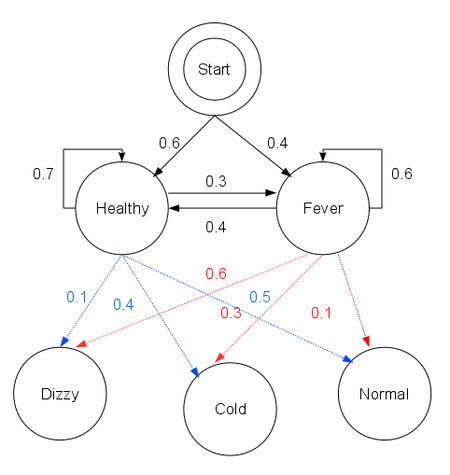

**Viterbi**
- normal on the first day
  + (healthy): the actually healthy probability: healthy probability 0.6 × healthy-normal-probability 0.5 = 0.3
  + (fever): the actually fever probability: fever probability 0.4 × fever-normal-probability 0.1 = 0.04 <Br>
  => first day: 0.3 (healthy)

- cold on the second day
  + (healthy, healthy): the actually healthy probability: actually healthy probability 0.3 × healthy-healthy-probability 0.7 × healthy-cold-probability 0.4 = 0.084
  + (healthy, fever): the actually healthy probability: actually healthy probability 0.3 × healthy-fever-probability 0.3 × fever-cold-probability 0.3 = 0.027  <Br>
  => second day: 0.084 (healthy, healthy)

- dizzy on the third day
  + (healthy, healthy, healthy): actually healthy probability 0.084 × healthy-healthy-probability 0.7 × healthy-dizzy-probability 0.1 = 0.00588
  + (healthy, healthy, fever): actually healthy probability 0.084 × healthy-fever-probability 0.3 × fever-dizzy-probability 0.6 = 0.01512 <Br>
  => third day: 0.01512 (healthy, healthy, fever)













Step 4: Based on the token-score dictionary find out the word's score, and split a given word into the best tokens (base characters and subwords) representing that word.
<Br>
  - Splitting a given word into all possible segmentation (tokens). The possible segmentation include a start position and an end position (at least 1 character). Ex: Hope: [H, o, p, e] => (1) H => H, Ho, Hop, Hope; (2) o => o, op, ope; (3) p => p, pe; (4) e => e.
  - Based on token-score dictionary to find out the best segmentations represent that word. Ex: [H, o, pe]
  - Accumulating score over all best segmentations (score(i) = score(i) + score(i-1)) and then score of the last segmentation represent score of that word. This score later will be used for next step.

In [ ]:
def encode_word(word, model):

  #Indexes of best_segmentations represent the end position of the best segmentation
  #that stores one dictionary includes the start position and the score of that best segmentation.
  #So the first element is only used as an anchor.
  best_segmentations = [{"start": 0, "score": 0}] + [{"start": None, "score": None} for _ in range(len(word))]

  #Iterating over all possible segmentation to find out the best segmentations.
  for start_idx in range(len(word)): #start position of a segmentation
    #Score of a segmentation from start position to end position
    best_score_at_start = best_segmentations[start_idx]["score"]
    for end_idx in range(start_idx + 1, len(word) + 1): #end position of a segmentation
      token = word[start_idx:end_idx]
      #Only considering segmentation is in token-score dictionary (all characters & the best subwords in term of frequency)
      #If not => unknow token with score is None
      if token in model and best_score_at_start is not None:
        #accumulate score over all best segmentations
        score = model[token] + best_score_at_start
        #only update info of the best segmentations (end position_(start position, segmentation score))
        #if the best segmentation is not available or there is a better score
        if (best_segmentations[end_idx]["score"] is None or best_segmentations[end_idx]["score"] > score):
            best_segmentations[end_idx] = {"start": start_idx, "score": score}

  #look back from the last segmentation in the best segmentation list
  segmentation = best_segmentations[-1]
  #accumulated score over all segmentions means score at the last segmentation represent score of given word
  if segmentation["score"] is None:
    # We did not find a tokenization of the word -> unknown
    return ["<unk>"], None
  score = segmentation["score"]
  start = segmentation["start"]
  end = len(word)

  #convert the best segmentations (end position_(start position, segmentation score))
  #into the best tokens (base characters and subwords) representing that word
  tokens = []
  while start != 0:
    tokens.insert(0, word[start:end])
    #start position is new end position of a previous segmentation
    #=> end position_(start position, segmentation score) => "start" ~ new start position of a previous segmentation
    #update end position
    end = start
    #update start position
    next_start = best_segmentations[start]["start"]
    start = next_start
  tokens.insert(0, word[start:end])
  return tokens, score

word = "segmentation"
encode_word(word, model)

(['se', 'g', 'm', 'en', 't', 'ation'], 31.58787402433851)

Step 5: Iterate several times to find the best tokens (in case if remove them will be no/slight difference (loss) between the original vocabulary and removed given tokens' vocabulary). And then removing these tokens to reach the desired vocabulary size. <Br>
  - Assuming that the training data consists of the words $x_{1}, \dots, x_{N}$ and that the set of all possible tokenizations for a word $x_{i}$ is defined as $S(x_{i})$, then the overall loss is defined as $$\mathcal{L} = -\sum_{i=1}^{N} \log \left ( \sum_{x \in S(x_{i})} p(x) \right )$$
  - Comparing losses of original vocabulary and removed given token's vocabulary. The smaller loss score means there is no/slight difference between 2 losses (it will be the best token and can be removed from the vocabulary).
  - Iterating several times to find the best tokens and removing these tokens to reach the desired vocabulary size.











In [ ]:
def compute_loss(model):
    loss = 0
    for word, freq in word_freqs.items():
        _, word_loss = encode_word(word, model)
        #loss of vocabulary
        loss += freq * word_loss
    return loss

import copy
def compute_scores(model):
    scores = {}
    #Calculating loss of original vocabulary
    model_loss = compute_loss(model)
    for token, score in model.items():
        # We always keep tokens of length 1
        if len(token) == 1:
            continue
        model_without_token = copy.deepcopy(model)
        _ = model_without_token.pop(token)
        #Calculating loss score when deleting a given token
        scores[token] = compute_loss(model_without_token) - model_loss
    return scores

percent_to_remove = 0.1
while len(model) > 100:
    scores = compute_scores(model)
    sorted_scores = sorted(scores.items(), key=lambda x: x[1])
    # Remove percent_to_remove tokens with the lowest scores.
    for i in range(int(len(model) * percent_to_remove)):
        _ = token_freqs.pop(sorted_scores[i][0])
    #updating new vocabulary
    total_sum = sum([freq for token, freq in token_freqs.items()])
    model = {token: -log(freq / total_sum) for token, freq in token_freqs.items()}

def tokenize(text, model):
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
    pre_tokenized_text = [word for word, offset in words_with_offsets]
    encoded_words = [encode_word(word, model)[0] for word in pre_tokenized_text]
    return sum(encoded_words, [])

print(tokenize("This is the Hugging Face course.", model))

['▁This', '▁is', '▁the', '▁Hugging', '▁Face', '▁', 'c', 'ou', 'r', 's', 'e', '.']
